# DSCI 235 Final Project - Winter Olympics
### By: Ethan Powers & Nathan Mitchell
#### Data Used:
Source: https://raw.githubusercontent.com/BEthanPowerfuls90/DSCI235_Project/main/Winer%20Olympic%20Medals.csv             
#### GitHub:

Link: https://github.com/BEthanPowerfuls90/DSCI235_Project

---
#### Description:
For this project, we will be analyzing data concerning the Winter Olympics since its induction in 1924 up until 2014. The only years in which the Winter Olympics did not take place were in 1940 and 1944 because of World War II. To guide this project, we have come up with two hypotheses. We will use the data and data visualizations to support or reject these hypotheses. First, though, in a preliminary analysis, we wish to see which countries have won the most total, gold, silver, and bronze medals. With this we will plot a medal breakdown for the top three medal-winning countries. This information will be used throughout the rest of the project.
    
To start, we believe that since the first Winter Olympics there has been an increase in the number of medal-winning events. Because of this, we believe that countries will have seen an increase in the number of total medals they have won over the years. This raises our first hypothesis. We believe that the proportion of medals won by the top-three medal-winning countries has stayed the same as more medal-winning events have been introduced. To analyze this, we will plot the number of medals won at every game and compare this to the total number of medals the top three medal-winning countries have won and the percent of total medals these countries have won over the years.
    
A second question that we wish to answer is what the top medal-producing events are for the three countries that have won the most total medals. The results from this will tie into our next hypothesis.
    
Our second hypothesis that we wish to examine with our data is to see if countries that are known for a specific event rank highest in overall gold medals and overall total medals in their respective well-known event. To go along with this, we wish to analyze if each of the top-three medal-winning countries place first in gold and total medals won for their respective highest medal-winning event.

On top of this, we wish to examine events that don't have an immediate top medal-winning country that comes to mind. Curling, for example, is an event at the Winter Olympics, but no immediate country comes to mind as to who may rank best in this event. Curling is just one example, but we will also examine Luge, Alpine Skiing, and Snowboarding to see which countries rank highest in total and gold medals won.

#### Work Breakdown:
We each contributed equal amounts to the project and, for the most part, worked on everything together, each of us inputting our own opinions on the others' work as it was being made. Thus, the project we have made is a combined effort totaling both of our knowledge of coding and data analysis concerning our self-generated hypotheses and questions.
    
 ---

 #### Loading In The Data:

In [1]:
import pandas as pd
from IPython.display import display_html 
%matplotlib inline
import matplotlib.pylab as plt

winter_raw = pd.read_csv('https://raw.githubusercontent.com/BEthanPowerfuls90/DSCI235_Project/main/Winer%20Olympic%20Medals.csv')

 #### Creating a Multi-Index:

In [2]:
idx = pd.IndexSlice

winter = winter_raw.sort_values(by = ['Country', 'Year', 'Sport'], ascending = True)
winter['Medal Rank'] = winter['Medal Rank'].apply(lambda x: 1)
winter = winter.set_index(['Country', 'Sport', 'Year', 'Medal'])
winter = winter.rename(columns = {'Medal Rank':'Medal Count'})

# Question One – Top Medal-Winning Countries

### Each Participating Country and Medals they have Won, by Type:

In [3]:
tot_med = winter.groupby(['Country', 'Medal']).aggregate('sum')
tot_med

Medal Count
Country      Medal              
Australia    bronze            4
             gold              5
             silver            3
Austria      bronze           81
             gold             59
...                          ...
West Germany bronze           13
             gold             11
             silver           15
Yugoslavia   bronze            1
             silver            3

[117 rows x 1 columns]

### Countries Ranked by Total Number of Medals Won:

In [4]:
med_rank = tot_med.groupby(['Country']).sum().sort_values(by = 'Medal Count', ascending = False)

med_rank_1 = med_rank.iloc[0:11].style.set_table_attributes("style='display:inline'")
med_rank_2 = med_rank.iloc[11:22].style.set_table_attributes("style='display:inline'")
med_rank_3 = med_rank.iloc[22:33].style.set_table_attributes("style='display:inline'")
med_rank_4 = med_rank.iloc[33:44].style.set_table_attributes("style='display:inline'")

display_html(med_rank_1._repr_html_() + med_rank_2._repr_html_() + med_rank_3._repr_html_() + med_rank_4._repr_html_(), raw=True)

,Medal Count
Country,
Norway,329
United States,282
Germany,228
Austria,218
Soviet Union,194
Canada,170
Finland,161
Sweden,144
Switzerland,138


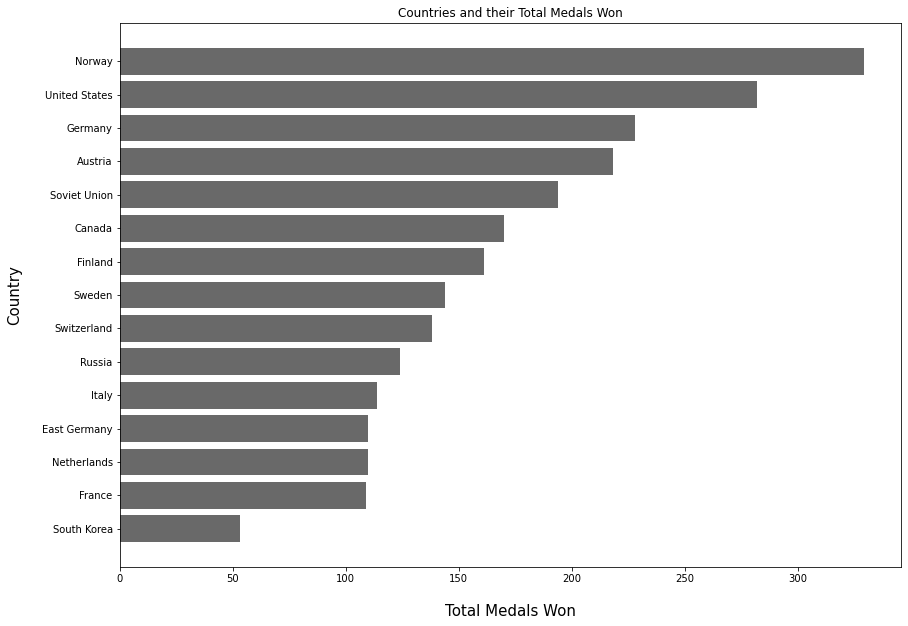

In [5]:
fig = plt.figure(figsize=(14, 10))
top_15 = med_rank.head(15).sort_values(by='Medal Count').reset_index()
plt.barh(top_15['Country'], top_15['Medal Count'], color='dimgray')
plt.xlabel('Total Medals Won', labelpad=20, size=15)
plt.ylabel('Country', labelpad=20, size=15);
plt.title('Countries and their Total Medals Won');

### Countries Ranked by Total Number of Gold, Silver, and Bronze Medals Won:

In [6]:
Gold = tot_med.loc[idx[:, 'gold', :]].sort_values(by = 'Medal Count', ascending = False).head().style.set_table_attributes("style='display:inline'")
Silver = tot_med.loc[idx[:, 'silver', :]].sort_values(by = 'Medal Count', ascending = False).head().style.set_table_attributes("style='display:inline'")
Bronze = tot_med.loc[idx[:, 'bronze', :]].sort_values(by = 'Medal Count', ascending = False).head().style.set_table_attributes("style='display:inline'")

display_html(Gold._repr_html_() + Silver._repr_html_() + Bronze._repr_html_(), raw=True)

,,Medal Count
Country,Medal,
Norway,gold,118
United States,gold,96
Germany,gold,86
Soviet Union,gold,78
Canada,gold,62
,,Medal Count
Country,Medal,
Norway,silver,111
United States,silver,102


These preliminary findings show that Norway has won the most gold, silver, and bronze medals at the Winter Olympics, also showing they have won the most total medals. In second place for gold, silver, and bronze medals won is the United States, the United States also coming in second for total medals won. Germany comes in third place for gold, silver, and total medals won, but Austria is third for bronze medals won.

Now we will break down how many gold, silver, and bronze medals each of the top three medal-winning countries have won over the years before we get to our first hypothesis.

### Medal Breakdown - Top Three Medal-Winning Countries

#### Norway:

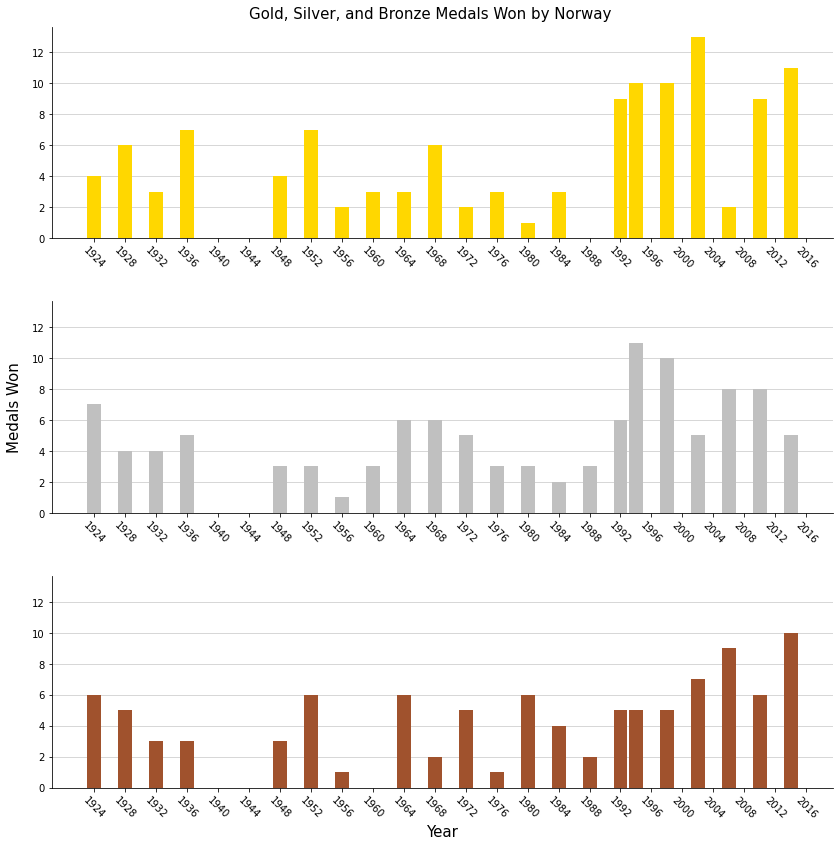

In [7]:
fig, axs = plt.subplots(3, sharex = False, sharey = True)
fig.set_figheight(14); fig.set_figwidth(14)
plt.suptitle('Gold, Silver, and Bronze Medals Won by Norway', y=.9, size=15)

#Plotting the number of gold medals won
medal_plot_gold = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'gold', :]]

Norway_one_gold = medal_plot_gold.loc['Norway']['Medal Count'].loc[1924:1940]
Norway_two_gold = medal_plot_gold.loc['Norway']['Medal Count'].loc[1948:1984]
Norway_three_gold = medal_plot_gold.loc['Norway']['Medal Count'].loc[1988:1994]
Norway_four_gold = medal_plot_gold.loc['Norway']['Medal Count'].loc[1994:2014]

x1 = range(1924, 1940, 4); x2 = range(1948, 1985, 4); x3 = range(1992, 1995, 2); x4 = range(1994, 2015, 4)

axs[0].bar(x1, Norway_one_gold, color = 'gold', width = 1.8)
axs[0].bar(x2, Norway_two_gold, color = 'gold', width = 1.8)
axs[0].bar(x3, Norway_three_gold, color = 'gold', width = 1.8)
axs[0].bar(x4, Norway_four_gold, color = 'gold', width = 1.8)
plt.sca(axs[0])
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
plt.grid(axis = 'y', linewidth = 0.5)
axs[0].set_axisbelow(True)

#Plotting the number of silver medals won
medal_plot_silver = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'silver', :]]

Norway_one_silver = medal_plot_silver.loc['Norway']['Medal Count'].loc[1924:1940]
Norway_two_silver = medal_plot_silver.loc['Norway']['Medal Count'].loc[1948:1992]
Norway_three_silver = medal_plot_silver.loc['Norway']['Medal Count'].loc[1994:2014]

x5 = range(1948, 1995, 4)

axs[1].bar(x1, Norway_one_silver, color = 'silver', width = 1.8)
axs[1].bar(x5, Norway_two_silver, color = 'silver', width = 1.8)
axs[1].bar(x4, Norway_three_silver, color = 'silver', width = 1.8)
plt.sca(axs[1])
plt.ylabel('Medals Won', fontsize=15, labelpad=10)
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
plt.grid(axis = 'y', linewidth = 0.5)
axs[1].set_axisbelow(True)

#Plotting the number of bronze medals won
medal_plot_bronze = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'bronze', :]]

Norway_one_bronze = medal_plot_bronze.loc['Norway']['Medal Count'].loc[1924:1940]
Norway_two_bronze = medal_plot_bronze.loc['Norway']['Medal Count'].loc[1948:1956]
Norway_three_bronze = medal_plot_bronze.loc['Norway']['Medal Count'].loc[1964:1992]
Norway_four_bronze = medal_plot_bronze.loc['Norway']['Medal Count'].loc[1994:2014]

x6 = range(1948, 1957, 4); x7 = range(1964, 1995, 4); x8 = range(1994, 2015, 4)

axs[2].bar(x1, Norway_one_bronze, color = 'sienna', width = 1.8)
axs[2].bar(x6, Norway_two_bronze, color = 'sienna', width = 1.8)
axs[2].bar(x7, Norway_three_bronze, color = 'sienna', width = 1.8)
axs[2].bar(x8, Norway_four_bronze, color = 'sienna', width = 1.8)
plt.sca(axs[2])
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].set_xlabel('Year', fontsize = 15)
plt.grid(axis = 'y', linewidth = 0.5)
axs[2].set_axisbelow(True)

plt.subplots_adjust(hspace = .3)

One of the first things we noticed from creating this plot was that the years did not line up properly. The first Winter Olympics was held in 1924. If held every four years, there should have been games in 2008 and 2012. This, however, is not the case. What we learned is that in the 1990s the games were changed to happen between the Summer Olympics, so the Winter Olympics were held in 1992 and the again two years later in 1994. Visually, this can be seen by looking at the numbers of medals won 1994 and beyond. Instead of occurring on a tick, they appear between ticks.

#### The United States:

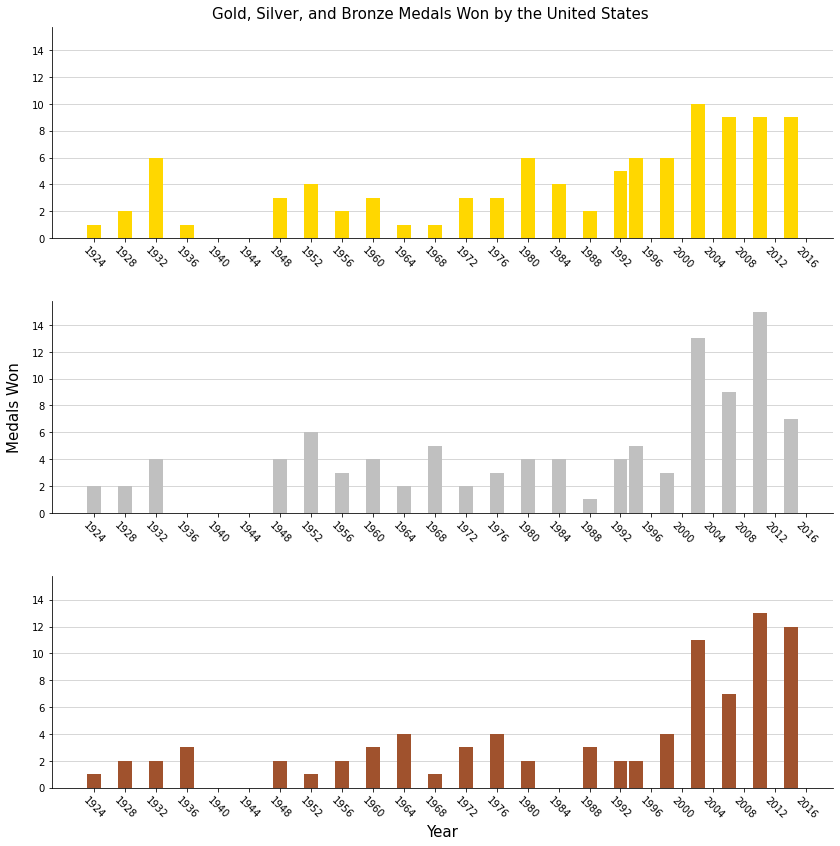

In [8]:
fig, axs = plt.subplots(3, sharex = False, sharey = True)
fig.set_figheight(14); fig.set_figwidth(14)
plt.suptitle('Gold, Silver, and Bronze Medals Won by the United States', y=.9, size=15)

#Plotting the number of gold medals won
medal_plot_gold = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'gold', :]]

USA_one_gold = medal_plot_gold.loc['United States']['Medal Count'].loc[1924:1940]
USA_two_gold = medal_plot_gold.loc['United States']['Medal Count'].loc[1948:1992]
USA_three_gold = medal_plot_gold.loc['United States']['Medal Count'].loc[1994:2014]

x1 = range(1924, 1940, 4); x2 = range(1948, 1995, 4); x3 = range(1994, 2015, 4)

axs[0].bar(x1, USA_one_gold, color = 'gold', width = 1.8)
axs[0].bar(x2, USA_two_gold, color = 'gold', width = 1.8)
axs[0].bar(x3, USA_three_gold, color = 'gold', width = 1.8)

plt.sca(axs[0])
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
plt.grid(axis = 'y', linewidth = 0.5)
axs[0].set_axisbelow(True)

#Plotting the number of silver medals won
medal_plot_silver = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'silver', :]]

USA_one_silver = medal_plot_silver.loc['United States']['Medal Count'].loc[1924:1933]
USA_two_silver = medal_plot_silver.loc['United States']['Medal Count'].loc[1948:1992]
USA_three_silver = medal_plot_silver.loc['United States']['Medal Count'].loc[1994:2014]

x4 = range(1924, 1933, 4); x5 = range(1948, 1995, 4); x6 = range(1994, 2015, 4)

axs[1].bar(x4, USA_one_silver, color = 'silver', width = 1.8)
axs[1].bar(x5, USA_two_silver, color = 'silver', width = 1.8)
axs[1].bar(x6, USA_three_silver, color = 'silver', width = 1.8)

plt.sca(axs[1]); plt.ylabel('Medals Won', fontsize=15, labelpad=10)
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
plt.grid(axis = 'y', linewidth = 0.5)
axs[1].set_axisbelow(True)

#Plotting the number of bronze medals won
medal_plot_bronze = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'bronze', :]]

USA_one_bronze = medal_plot_bronze.loc['United States']['Medal Count'].loc[1924:1940]
USA_two_bronze = medal_plot_bronze.loc['United States']['Medal Count'].loc[1948:1980]
USA_three_bronze = medal_plot_bronze.loc['United States']['Medal Count'].loc[1988:1992]
USA_four_bronze = medal_plot_bronze.loc['United States']['Medal Count'].loc[1994:2014]

x7 = range(1948, 1981, 4); x8 = range(1988, 1993, 4); x9 = range(1994, 2015, 4)

axs[2].bar(x1, USA_one_bronze, color = 'sienna', width = 1.8)
axs[2].bar(x7, USA_two_bronze, color = 'sienna', width = 1.8)
axs[2].bar(x8, USA_three_bronze, color = 'sienna', width = 1.8)
axs[2].bar(x9, USA_four_bronze, color = 'sienna', width = 1.8)

plt.sca(axs[2])
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].set_xlabel('Year', fontsize = 15)
plt.grid(axis = 'y', linewidth = 0.5)
axs[2].set_axisbelow(True)

plt.subplots_adjust(hspace = .3)

#### Germany:

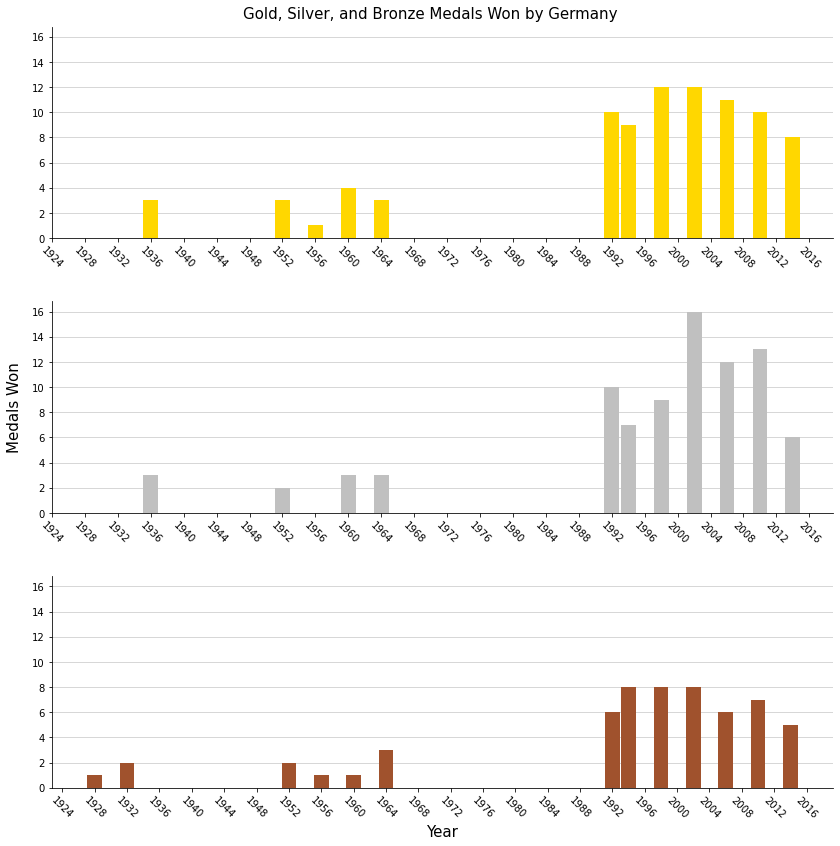

In [9]:
fig, axs = plt.subplots(3, sharex = False, sharey = True)
fig.set_figheight(14); fig.set_figwidth(14)
plt.suptitle('Gold, Silver, and Bronze Medals Won by Germany', y=.9, size=15)

#Plotting the number of gold medals won
medal_plot_gold = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'gold', :]]

Germany_one_gold = medal_plot_gold.loc['Germany']['Medal Count'].loc[1936:1940]
Germany_two_gold = medal_plot_gold.loc['Germany']['Medal Count'].loc[1952:1968]
Germany_three_gold = medal_plot_gold.loc['Germany']['Medal Count'].loc[1992]
Germany_four_gold = medal_plot_gold.loc['Germany']['Medal Count'].loc[1994:2014]

x1 = range(1936, 1940, 4); x2 = range(1952, 1968, 4); x3 = 1992 ;x4 = range(1994, 2015, 4)

axs[0].bar(x1, Germany_one_gold, color = 'gold', width = 1.8)
axs[0].bar(x2, Germany_two_gold, color = 'gold', width = 1.8)
axs[0].bar(x3, Germany_three_gold, color = 'gold', width = 1.8)
axs[0].bar(x4, Germany_four_gold, color = 'gold', width = 1.8)

plt.sca(axs[0])
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
plt.grid(axis = 'y', linewidth = 0.5)
axs[0].set_axisbelow(True)

#Plotting the number of silver medals won
medal_plot_silver = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'silver', :]]

Germany_one_silver = medal_plot_silver.loc['Germany']['Medal Count'].loc[1936]
Germany_two_silver = medal_plot_silver.loc['Germany']['Medal Count'].loc[1952]
Germany_three_silver = medal_plot_silver.loc['Germany']['Medal Count'].loc[1960:1964]
Germany_four_silver = medal_plot_silver.loc['Germany']['Medal Count'].loc[1992]
Germany_five_silver = medal_plot_silver.loc['Germany']['Medal Count'].loc[1994:2014]

x5 = 1936; x6 = 1952; x7 = range(1960, 1965, 4); x8 = 1992; x9 = range(1994, 2015, 4)

axs[1].bar(x5, Germany_one_silver, color = 'silver', width = 1.8)
axs[1].bar(x6, Germany_two_silver, color = 'silver', width = 1.8)
axs[1].bar(x7, Germany_three_silver, color = 'silver', width = 1.8)
axs[1].bar(x8, Germany_four_silver, color = 'silver', width = 1.8)
axs[1].bar(x9, Germany_five_silver, color = 'silver', width = 1.8)

plt.sca(axs[1])
plt.ylabel('Medals Won', fontsize=15, labelpad=10)
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
plt.grid(axis = 'y', linewidth = 0.5)
axs[1].set_axisbelow(True)

#Plotting the number of bronze medals won
medal_plot_bronze = winter.groupby(['Country', 'Year', 'Medal']).aggregate('sum').loc[idx[:, :, 'bronze', :]]

Germany_one_bronze = medal_plot_bronze.loc['Germany']['Medal Count'].loc[1928:1932]
Germany_two_bronze = medal_plot_bronze.loc['Germany']['Medal Count'].loc[1952:1964]
Germany_three_bronze = medal_plot_bronze.loc['Germany']['Medal Count'].loc[1992]
Germany_four_bronze = medal_plot_bronze.loc['Germany']['Medal Count'].loc[1994:2014]

x10 = range(1928, 1933, 4); x11 = range(1952, 1965, 4); x3 = 1992; x4 = range(1994, 2015, 4)

axs[2].bar(x10, Germany_one_bronze, color = 'sienna', width = 1.8)
axs[2].bar(x11, Germany_two_bronze, color = 'sienna', width = 1.8)
axs[2].bar(x3, Germany_three_bronze, color = 'sienna', width = 1.8)
axs[2].bar(x4, Germany_four_bronze, color = 'sienna', width = 1.8)

plt.sca(axs[2])
plt.xticks(range(1924, 2020, 4), rotation = -45)
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].set_xlabel('Year', fontsize = 15)
plt.grid(axis = 'y', linewidth = 0.5)
axs[2].set_axisbelow(True)

plt.subplots_adjust(hspace = .3)

Something we noticed is that Germany has a large gap in their medals won from 1968 to 1998 but not directly after World War II ended. After looking at the data and historical records, we realized that Germany, in the Winter Olympics, was split into West and East Germany starting in 1968. Each country sent their own delegates to the Olympics and thus that data is not included in the data for Germany. Because of this, we had to decide whether or not to include West and East Germany into Germany's total medals won. If we did, Germany would now be the top Medal-Producing country, beating out Norway and the United States. We, however, decided to not add the totals from West and East Germany to the total. We decided that, when separated, West and East Germany had the potential to send more delegates and win more medal than Germany could have if it remained one country. We add the total medals won by East and West Germany to our next plot for educational purposes but don't consider the medals won by those two countries as part of Germany's total medals won.

##  Hypothesis One - Total and Percent Medals Won

#### Subsetting the Data:

In [10]:
norway_tot = pd.DataFrame(winter.groupby(['Country', 'Year']).aggregate('sum').loc['Norway']['Medal Count'])
Norway_tot_one = norway_tot.loc[:]['Medal Count'].loc[1924:1940]
Norway_tot_two = norway_tot.loc[:]['Medal Count'].loc[1948:1992]
Norway_tot_three = norway_tot.loc[:]['Medal Count'].loc[1992:1995]
Norway_tot_four = norway_tot.loc[:]['Medal Count'].loc[1994:2015]

unitedStates_tot = pd.DataFrame(winter.groupby(['Country', 'Year']).aggregate('sum').loc['United States']['Medal Count'])
USA_tot_one = unitedStates_tot.loc[:]['Medal Count'].loc[1924:1940]
USA_tot_two = unitedStates_tot.loc[:]['Medal Count'].loc[1948:1992]
USA_tot_three = unitedStates_tot.loc[:]['Medal Count'].loc[1992:1995]
USA_tot_four = unitedStates_tot.loc[:]['Medal Count'].loc[1994:2015]

germany_tot = pd.DataFrame(winter.groupby(['Country', 'Year']).aggregate('sum').loc['Germany']['Medal Count'])
e_germany_tot = pd.DataFrame(winter.groupby(['Country', 'Year']).aggregate('sum').loc['East Germany']['Medal Count'])
w_germany_tot = pd.DataFrame(winter.groupby(['Country', 'Year']).aggregate('sum').loc['West Germany']['Medal Count'])

Germany_tot_one = germany_tot.loc[:]['Medal Count'].loc[1928:1940]
Germany_tot_two = germany_tot.loc[:]['Medal Count'].loc[1952:1965]
Germany_tot_three = germany_tot.loc[:]['Medal Count'].loc[1992]
Germany_tot_four = germany_tot.loc[:]['Medal Count'].loc[1992:1995]
Germany_tot_five = germany_tot.loc[:]['Medal Count'].loc[1994:2015]
e = e_germany_tot.loc[:]['Medal Count'].loc[1968:1988]
w = w_germany_tot.loc[:]['Medal Count'].loc[1968:1988]

#### Plotting Total Medals Won:

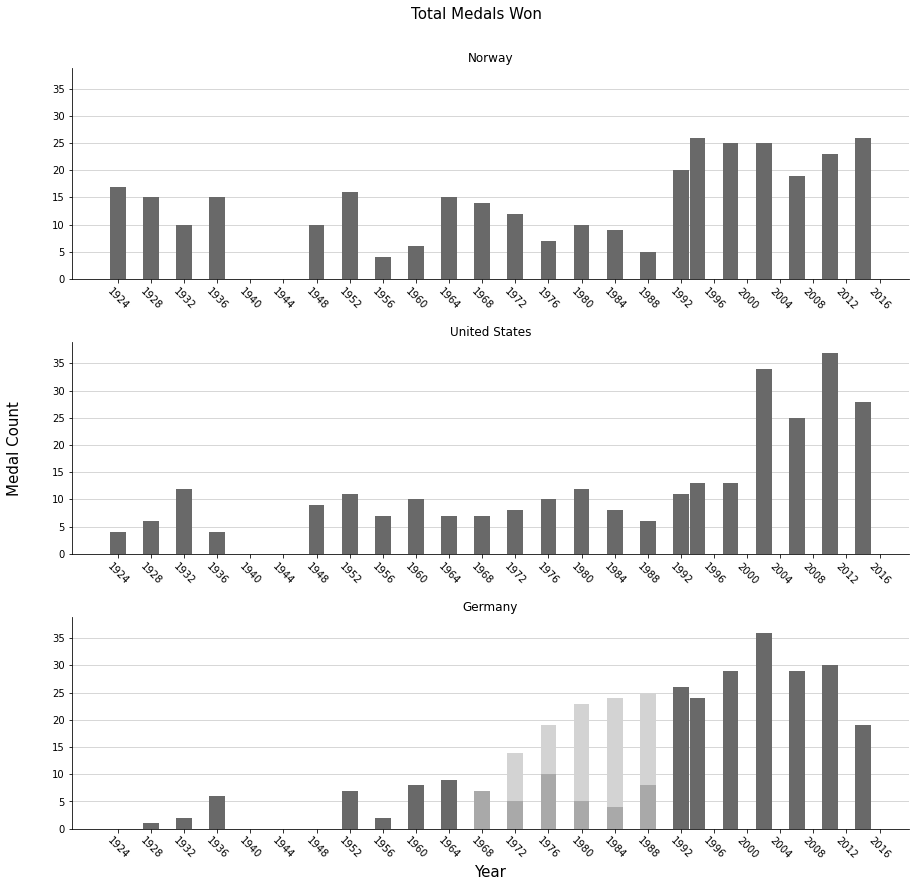

In [11]:
fig = plt.figure()
ax01 = fig.add_subplot(3, 1, 1)
ax11 = fig.add_subplot(3, 1, 2, sharey = ax01)
ax21 = fig.add_subplot(3, 1, 3, sharey = ax01, sharex = ax01)
fig.set_figheight(14); fig.set_figwidth(15)
plt.suptitle('Total Medals Won', y=.94, size=15)

x1 = range(1924, 1940, 4); x2 = range(1948, 1994, 4); x3 = range(1992, 1996, 2); x4 = range(1994, 2015, 4)

ax01.bar(x1, Norway_tot_one, color = 'dimgray', width = 1.9)
ax01.bar(x2, Norway_tot_two, color = 'dimgray', width = 1.9)
ax01.bar(x3, Norway_tot_three, color = 'dimgray', width = 1.9)
ax01.bar(x4, Norway_tot_four, color = 'dimgray', width = 1.9)

plt.sca(ax01)
plt.xticks(range(1924, 2020, 4), rotation = -45)
ax01.spines['top'].set_visible(False)
ax01.spines['right'].set_visible(False)
plt.grid(axis = 'y', linewidth = 0.5)
ax01.set_axisbelow(True)
ax01.set_title('Norway')

ax11.bar(x1, USA_tot_one, color = 'dimgray', width = 1.9)
ax11.bar(x2, USA_tot_two, color = 'dimgray', width = 1.9)
ax11.bar(x3, USA_tot_three, color = 'dimgray', width = 1.9)
ax11.bar(x4, USA_tot_four, color = 'dimgray', width = 1.9)

plt.sca(ax11)
plt.xticks(range(1924, 2020, 4), rotation = -45)
ax11.spines['top'].set_visible(False)
ax11.spines['right'].set_visible(False)
plt.grid(axis = 'y', linewidth = 0.5)
ax11.set_axisbelow(True)
ax11.set_ylabel('Medal Count', fontsize = 15, labelpad = 30)
ax11.set_title('United States')

x1 = range(1928, 1940, 4); x2 = range(1952, 1965, 4); x3 = 1992; x4 = range(1992, 1996, 2); x5 = range(1994, 2015, 4); x = range(1968, 1989, 4)

ax21.bar(x1, Germany_tot_one, color = 'dimgray', width = 1.9)
ax21.bar(x2, Germany_tot_two, color = 'dimgray', width = 1.9)
ax21.bar(x3, Germany_tot_three, color = 'dimgray', width = 1.9)
ax21.bar(x4, Germany_tot_four, color = 'dimgray', width = 1.9)
ax21.bar(x5, Germany_tot_five, color = 'dimgray', width = 1.9)

ax21.bar(x, e, width = 1.9, color = 'lightgray')
ax21.bar(x, w, width = 1.9, color = 'darkgray')

plt.sca(ax21)
plt.xticks(range(1924, 2020, 4), rotation = -45)
ax21.spines['top'].set_visible(False)
ax21.spines['right'].set_visible(False)
plt.grid(axis = 'y', linewidth = 0.5)
ax21.set_axisbelow(True)
ax21.set_title('Germany')
ax21.set_xlabel('Year', size=15)

plt.subplots_adjust(hspace = .3)

Note: Light gray corresponds to the medals won by East Germany and the slightly darker gray corresponds to the medals won by West Germany.

This supports part of our first hypothesis. As the years have progressed, each of the top three medal-winning countries have seen an in-general increase in the total number of medals that they have won. Something that we wish to note is that Norway's graph of total medals won seems much flatter than the other two countries and does not seem to exhibit the same increase as the United States and Germany.

#### Subsetting the Data:

In [12]:
sport = winter_raw.loc[:, ['Year', 'Medal']].set_index(['Year']).sort_values(by = 'Year')
sport['Medal'] = sport['Medal'].apply(lambda x: 1)
sport = sport.groupby(['Year']).aggregate('sum')

tot_one = sport.loc[:]['Medal'].loc[1924:1940]
tot_two = sport.loc[:]['Medal'].loc[1948:1992]
tot_three = sport.loc[:]['Medal'].loc[1992:1995]
tot_four = sport.loc[:]['Medal'].loc[1994:2015]

norway_tot = pd.DataFrame(winter.groupby(['Country', 'Year']).aggregate('sum').loc['Norway']['Medal Count'])
norway_tot['AVG'] = (norway_tot.loc[:]['Medal Count'] / sport.loc[:]['Medal'])

Norway_one = norway_tot.loc[:]['AVG'].loc[1924:1940]
Norway_two = norway_tot.loc[:]['AVG'].loc[1948:1992]
Norway_three = norway_tot.loc[:]['AVG'].loc[1992:1995]
Norway_four = norway_tot.loc[:]['AVG'].loc[1994:2015]

unitedStates_tot = pd.DataFrame(winter.groupby(['Country', 'Year']).aggregate('sum').loc['United States']['Medal Count'])
unitedStates_tot['AVG'] = (unitedStates_tot.loc[:]['Medal Count'] / sport.loc[:]['Medal'])

USA_one = unitedStates_tot.loc[:]['AVG'].loc[1924:1940]
USA_two = unitedStates_tot.loc[:]['AVG'].loc[1948:1992]
USA_three = unitedStates_tot.loc[:]['AVG'].loc[1992:1995]
USA_four = unitedStates_tot.loc[:]['AVG'].loc[1994:2015]

germany_tot['AVG'] = (germany_tot.loc[:]['Medal Count'] / sport.loc[:]['Medal'])
e_germany_tot['AVG'] = (e_germany_tot.loc[:]['Medal Count'] / sport.loc[:]['Medal'])
w_germany_tot['AVG'] = (w_germany_tot.loc[:]['Medal Count'] / sport.loc[:]['Medal'])

Germany_tot_one = germany_tot.loc[:]['AVG'].loc[1928:1940]
Germany_tot_two = germany_tot.loc[:]['AVG'].loc[1952:1965]
Germany_tot_three = germany_tot.loc[:]['AVG'].loc[1992]
Germany_tot_four = germany_tot.loc[:]['AVG'].loc[1992:1995]
Germany_tot_five = germany_tot.loc[:]['AVG'].loc[1994:2015]

e = e_germany_tot.loc[:]['AVG'].loc[1968:1988]
w = w_germany_tot.loc[:]['AVG'].loc[1968:1988]

#### Plotting The Percentage of Total Medals Won:

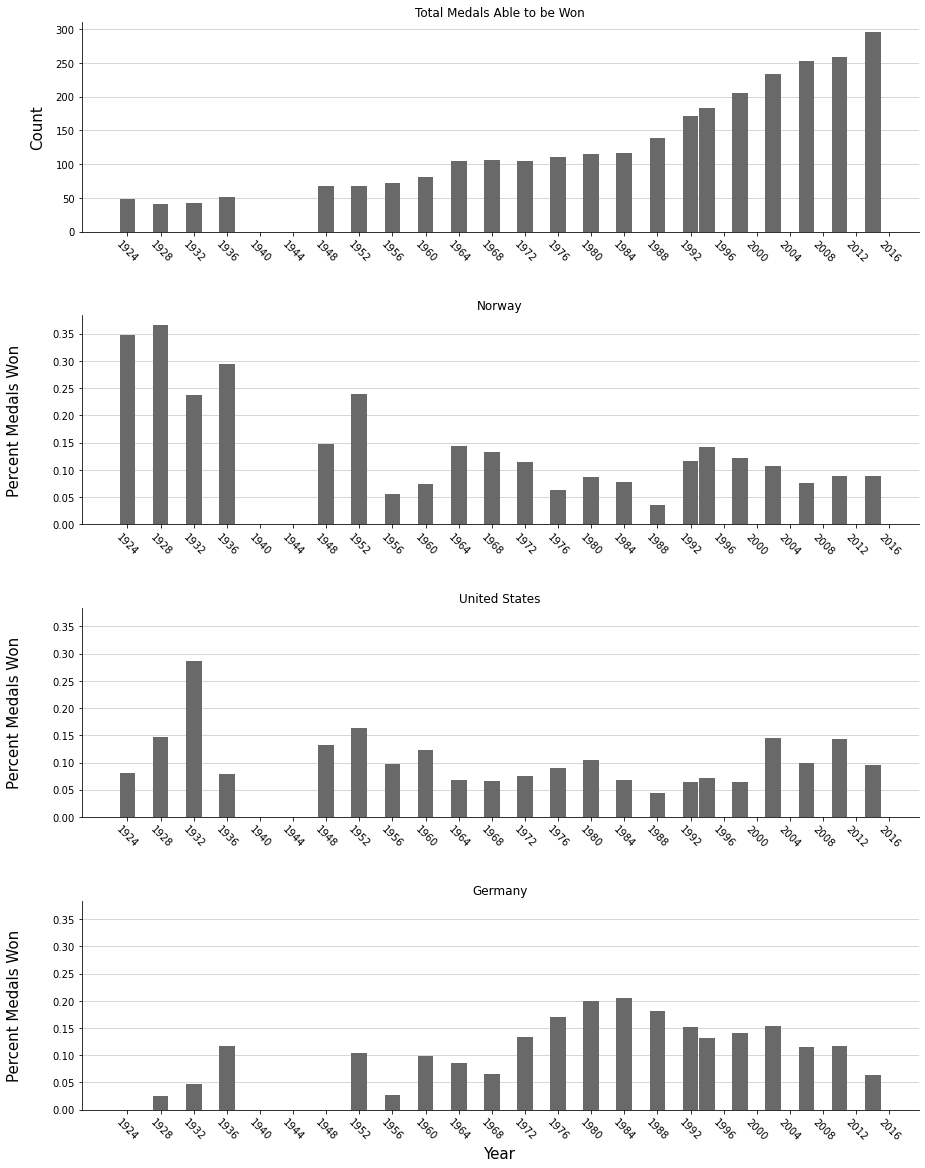

In [13]:
fig = plt.figure()
ax02 = fig.add_subplot(4, 1, 1)
ax12 = fig.add_subplot(4, 1, 2)
ax22 = fig.add_subplot(4, 1, 3, sharey = ax12)
ax32 = fig.add_subplot(4, 1, 4, sharey = ax12, sharex = ax12)
fig.set_figheight(20); fig.set_figwidth(15)

x1 = range(1924, 1940, 4); x2 = range(1948, 1994, 4); x3 = range(1992, 1996, 2); x4 = range(1994, 2015, 4)

ax02.bar(x1, tot_one, color = 'dimgray', width = 1.9)
ax02.bar(x2, tot_two, color = 'dimgray', width = 1.9)
ax02.bar(x3, tot_three, color = 'dimgray', width = 1.9)
ax02.bar(x4, tot_four, color = 'dimgray', width = 1.9)

plt.sca(ax02)
plt.xticks(range(1924, 2020, 4), rotation = -45)
ax02.spines['top'].set_visible(False)
ax02.spines['right'].set_visible(False)
plt.grid(axis = 'y', linewidth = 0.5)
ax02.set_axisbelow(True)
ax02.set_ylabel('Count', fontsize = 15, labelpad = 10)
ax02.set_title('Total Medals Able to be Won')


#Norway
ax12.bar(x1, Norway_one, color = 'dimgray', width = 1.9)
ax12.bar(x2, Norway_two, color = 'dimgray', width = 1.9)
ax12.bar(x3, Norway_three, color = 'dimgray', width = 1.9)
ax12.bar(x4, Norway_four, color = 'dimgray', width = 1.9)

plt.sca(ax12)
plt.xticks(range(1924, 2020, 4), rotation = -45)
ax12.spines['top'].set_visible(False)
ax12.spines['right'].set_visible(False)
plt.grid(axis = 'y', linewidth = 0.5)
ax12.set_axisbelow(True)
ax12.set_title('Norway')
ax12.set_ylabel('Percent Medals Won', fontsize = 15, labelpad = 30)

#United States
ax22.bar(x1, USA_one, color = 'dimgray', width = 1.9)
ax22.bar(x2, USA_two, color = 'dimgray', width = 1.9)
ax22.bar(x3, USA_three, color = 'dimgray', width = 1.9)
ax22.bar(x4, USA_four, color = 'dimgray', width = 1.9)

plt.sca(ax22)
plt.xticks(range(1924, 2020, 4), rotation = -45)
ax22.spines['top'].set_visible(False)
ax22.spines['right'].set_visible(False)
plt.grid(axis = 'y', linewidth = 0.5)
ax22.set_axisbelow(True)
ax22.set_ylabel('Percent Medals Won', fontsize = 15, labelpad = 30)
ax22.set_title('United States')

#Germany
x1 = range(1928, 1940, 4); x2 = range(1952, 1965, 4); x3 = 1992; x4 = range(1992, 1996, 2); x5 = range(1994, 2015, 4); x = range(1968, 1989, 4)

ax32.bar(x1, Germany_tot_one, color = 'dimgray', width = 1.9)
ax32.bar(x2, Germany_tot_two, color = 'dimgray', width = 1.9)
ax32.bar(x3, Germany_tot_three, color = 'dimgray', width = 1.9)
ax32.bar(x4, Germany_tot_four, color = 'dimgray', width = 1.9)
ax32.bar(x5, Germany_tot_five, color = 'dimgray', width = 1.9)

ax32.bar(x, e, width = 1.9, label = 'East Germany', color = 'dimgray')
ax32.bar(x, w, width = 1.9, label = 'West Germany', color = 'dimgray')

plt.sca(ax32)
plt.xticks(range(1924, 2020, 4), rotation = -45)
ax32.spines['top'].set_visible(False)
ax32.spines['right'].set_visible(False)
ax32.set_xlabel('Year', fontsize = 15)
plt.grid(axis = 'y', linewidth = 0.5)
ax32.set_axisbelow(True)
ax32.set_title('Germany')
ax32.set_ylabel('Percent Medals Won', fontsize = 15, labelpad = 30)

plt.subplots_adjust(hspace = .4)

##### Analysis - Norway

After analyzing the graph of total medals won, Norway's graph does not surprise us. Their medal-winning has remained, for the most part, consistent. While it is true that in recent years, they have seen an increase in medals won, that, too, stagnated after the initial increase. This result also makes sense when looking at the number of total number of medals able to be won. This number has continued to steadily increase over the years while Norway's medal-winning, as previously stated, hasn't. Because of this, it is not surprising to see that they have decreased in the percent of medals taken in over the years. for that event.

##### Analysis - United States

In contrast to Norway’s medal performance over the years, the United States has pretty much stayed proportional when comparing the number of medals, they have won to the total number of medals that are able to be won. The United States had one good year of medal-winning back in 1932, but this outlier should not speak to the general trend. This result does not surprise us. When comparing the graph of total medals won by the United States and total medals able to be won they are very similar in shape. As the number of medals increases so does the number of medals the United States has won.
    
We were surprised to see the massive jump in total medals won during the 21st Century, jumping from an average of 7 - 13 medals won to around 30. Despite this, the percent of total medals that they have won over the years has stayed relatively the same, averaging around 10%. The United States, then, has won more of the available total medals in the more recent years as the number of medals able to be won continues to grow. As can be seen in the plot of total medals able to be won over the years, there are more medals to be won and more events to compete in, and the United States has taken that opportunity to send athletes to win themselves more medals.

##### Analysis - Germany

Pre-World War II, Germany didn't win very many total medals. The is the first Winter Olympic games after World II Germany didn't win any medals, but this was because they were not invited to participate due to instigating the war. When they were invited back, East and West Germany participated as one unified team representing Germany from 1952 up until 1964. In 1968, however, the two countries participated as their own separate entities. This has been cited to be because of the Berlin Wall being constructed, which physically separated the ideologies and the people of the two countries. The two countries continued to operate as two distinct Olympic teams up until the 1992 Winter Olympic games as the Berlin Wall fell in November of 1989 and Germany became a unified country once more. After this, the East and West teams were competed as one team once again.
    
Something that we noticed is that East Germany outperformed West Germany in the Winter Olympics for the years the two teams competed separately. We also noticed that the unified German team picked up where the two countries left off in total medals earned after they rejoined. This doesn't come as a surprise. With one team comprised of many of the delegates from West and East Germany and all the coaches and trainers from each country working together, seeing that they won a comparable number of total medals isn't surprising. 
    
One thing to note about the percentage of medals won is that the combined total of East and West Germany led to the highest proportion of medals won, that can be won, that Germany had ever seen even though Germany has roughly won more medals since 1992. Since 1988 however, the number of medal-winning events has been increasing, nearly doubling since 1988. It can then be seen that Germany, despite winning more and more medals, has still seen a decrease in percent of medals won because of the number of medal-winning events that are being added.

# Question Two – Countries and their Top Medal-Producing Events

#### Top Medal-Winning Event, by Type, for the Top-Three Medal-Winning Countries:

In [14]:
Medal_by_Sport = winter.groupby(['Country', 'Sport', 'Medal']).aggregate('sum').sort_values(by='Medal Count', ascending=False)

Norway_Med = Medal_by_Sport.loc[idx['Norway', :, :, :]].head(5).style.set_table_attributes("style='display:inline'")
US_Med = Medal_by_Sport.loc[idx['United States', :, :, :]].head(5).style.set_table_attributes("style='display:inline'")
Germany_Med = Medal_by_Sport.loc[idx['Germany', :, :, :]].head(5).style.set_table_attributes("style='display:inline'")

display_html(Norway_Med._repr_html_() + US_Med._repr_html_() + Germany_Med._repr_html_(), raw=True)

Medal Count 
 
 
 Country 
 Sport 
 Medal 
   
 
 
 
 
 Norway 
 Cross-Country Skiing 
 gold 
 40 
 
 
 silver 
 38 
 
 
 bronze 
 29 
 
 
 Speedskating 
 silver 
 28 
 
 
 bronze 
 27 
 
 
 

 
 
 
   
   
   
 Medal Count 
 
 
 Country 
 Sport 
 Medal 
   
 
 
 
 
 United States 
 Speedskating 
 gold 
 29 
 
 
 silver 
 22 
 
 
 Alpine Skiing 
 silver 
 19 
 
 
 Figure Skating 
 bronze 
 17 
 
 
 silver 
 16 
 
 
 

 
 
 
   
   
   
 Medal Count 
 
 
 Country 
 Sport 
 Medal 
   
 
 
 
 
 Germany 
 Biathlon 
 silver 
 20 
 
 
 Luge 
 gold 
 17 
 
 
 Speedskating 
 silver 
 16 
 
 
 Biathlon 
 gold 
 16 
 
 
 Alpine Skiing 
 gold 
 14

# Hypothesis Two – Countries and their Well-Known Events

## Part One: Ice Hockey and Figure Skating

In [15]:
winter_most_gold = winter_raw
winter_most_gold['Medal Rank'] = winter_most_gold['Medal Rank'].apply(lambda x:1)
winter_most_gold = (winter_most_gold.groupby(['Country', 'Sport', 'Medal']).sum()).drop(columns='Year')

winter_most_tot = winter_raw.groupby(['Country', 'Sport']).sum()
winter_most_tot = winter_most_tot.drop(columns='Year')

### Ice Hockey Gold & Total Medals Won by Country:

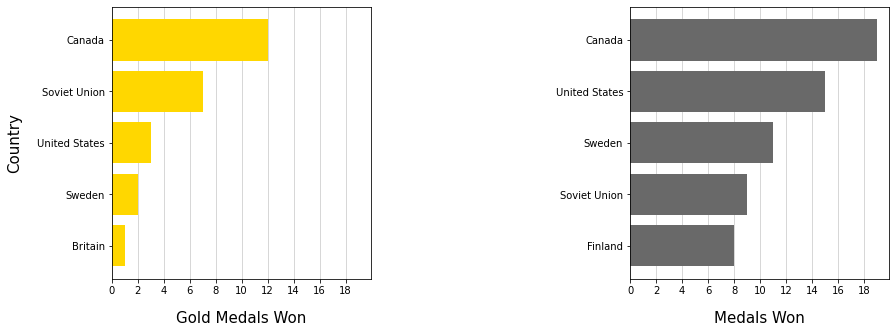

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)
fig.set_figheight(5); fig.set_figwidth(6)
plt.xticks(range(0,20,2))
hockey = winter_most_gold.loc[idx[:,'Ice Hockey', 'gold', :]].sort_values(by='Medal Rank', ascending=False).head(5)
hockey_tot = winter_most_tot.loc[idx[:,'Ice Hockey', :, :]].sort_values(by='Medal Rank', ascending = False).head(5)

hockey = hockey.reset_index().drop(['Sport', 'Medal'], axis=1).sort_index(ascending=False)
ax1.barh(hockey['Country'], hockey['Medal Rank'], color = 'gold')

hockey_tot = hockey_tot.reset_index().drop(['Sport'], axis=1).sort_index(ascending=False)
ax2.barh(hockey_tot['Country'], hockey_tot['Medal Rank'], color = 'dimgray')

plt.subplots_adjust(wspace = 1, right=2, left=.2)
ax1.set_xlabel('Gold Medals Won', labelpad=15, size=15)
ax2.set_xlabel('Medals Won', labelpad=15, size=15)
ax1.set_ylabel('Country', labelpad=15, size=15)
ax1.grid(axis = 'x', linewidth = 0.5)
ax1.set_axisbelow(True)
ax2.grid(axis = 'x', linewidth = 0.5)
ax2.set_axisbelow(True)

After finding which countries won the most gold and total medals in Ice Hockey, we can determine that Canada wins both the most gold and total medals. This helps supports our initial hypothesis that countries that are well known for certain winter events, dominate that event at the Winter Olympics since Canada is well known for Ice Hockey.

### Figure Sakting Gold & Total Medals Won by Country:

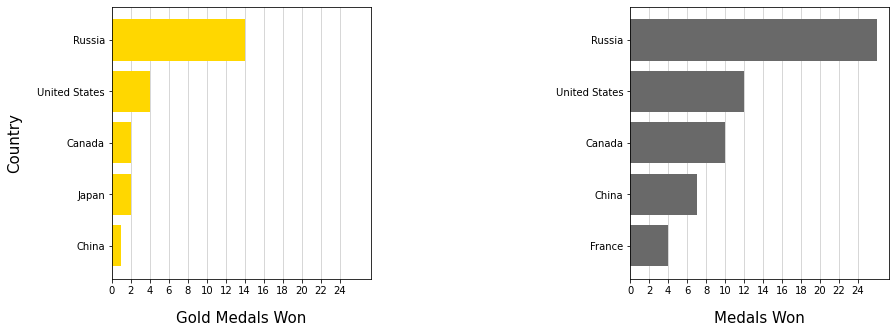

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)
fig.set_figheight(5); fig.set_figwidth(6)
plt.xticks(range(0,25,2))

winter_russia = winter_raw.loc[(winter_raw['Year'] >= 1994) & (winter_raw['Year'] <= 2014)]
winter_russia = (winter_russia.groupby(['Country', 'Sport', 'Medal']).sum()).drop(columns='Year')

winter_russia_tot = winter_russia.groupby(['Country', 'Sport']).sum()

skating = winter_russia.loc[idx[:,'Figure Skating', 'gold', :]].sort_values(by='Medal Rank', ascending = False).head(5)

skating_tot = winter_russia_tot.loc[idx[:,'Figure Skating', :, :]].sort_values(by='Medal Rank', ascending = False).head(5)

skating = skating.reset_index().drop(['Sport', 'Medal'], axis=1).sort_index(ascending=False)
ax1.barh(skating['Country'], skating['Medal Rank'], color = 'gold')

skating_tot = skating_tot.reset_index().drop(['Sport'], axis=1).sort_index(ascending=False)
ax2.barh(skating_tot['Country'], skating_tot['Medal Rank'], color = 'dimgray')

plt.subplots_adjust(wspace = 1, right=2, left=.2)
ax1.set_xlabel('Gold Medals Won', labelpad=15, size=15)
ax2.set_xlabel('Medals Won', labelpad=15, size=15)
ax1.set_ylabel('Country', labelpad=15, size=15)
ax1.grid(axis = 'x', linewidth = 0.5)
ax1.set_axisbelow(True)
ax2.grid(axis = 'x', linewidth = 0.5)
ax2.set_axisbelow(True)

We wanted to see if Russia won the most gold and total number of medals at the Winter Olympics for Figure Skating since they are well known in this event in order to support our third hypothesis. However, when we started analyzing the data for the Winter Olympics, we realized the Russia we were referring to was the Russian Federation, which was reorganized after the fall of the Soviet Union. With that said, we only used data from after 1994, which was when the Russian Federation first participated in the Winter Olympics. Another reason for using data after 1994 was because after the Soviet Union dissolved and the countries that were a part it became independent from Russia. Several of those countries now participate in Figure Skating at the Winter Olympics and have won medals, such as Ukraine and Kazakhstan. As such the medal won by the Soviet Union in Figure Skating can't count as medals won by Russia as an athlete who won a Figure Skating medal for the Soviet Union might have been from modern day Ukraine.
    
The data collected supports that our hypothesis is correct, as Russia has won the most gold and total medals at the Winter Olympics for Figure Skating. So, we can conclude that based on the data collected from the most gold and total medals for Ice Hockey and Figure Skating that countries that are well known for certain winter events win the most gold and total medals for that event at the Winter Olympics.

## Part Two: Top Medal-Producing Events

#### Top Medal-Winning Event for the Top-Three Medal-Winning Countries:

In [21]:
Medal_by_Sport_tot = winter.groupby(['Country', 'Sport']).aggregate('sum').sort_values(by='Medal Count', ascending=False)

Norway_Med_tot = Medal_by_Sport_tot.loc[idx['Norway', :, :, :]].head(5).style.set_table_attributes("style='display:inline'")
US_Med_tot = Medal_by_Sport_tot.loc[idx['United States', :, :, :]].head(5).style.set_table_attributes("style='display:inline'")
Germany_Med_tot = Medal_by_Sport_tot.loc[idx['Germany', :, :, :]].head(5).style.set_table_attributes("style='display:inline'")

display_html(Norway_Med_tot._repr_html_() + US_Med_tot._repr_html_() + Germany_Med_tot._repr_html_(), raw=True)

Medal Count 
 
 
 Country 
 Sport 
   
 
 
 
 
 Norway 
 Cross-Country Skiing 
 107 
 
 
 Speedskating 
 80 
 
 
 Biathlon 
 35 
 
 
 Ski Jumping 
 30 
 
 
 Nordic Combined 
 30 
 
 
 

 
 
 
   
   
 Medal Count 
 
 
 Country 
 Sport 
   
 
 
 
 
 United States 
 Speedskating 
 67 
 
 
 Figure Skating 
 48 
 
 
 Alpine Skiing 
 44 
 
 
 Snowboarding 
 24 
 
 
 Bobsled 
 24 
 
 
 

 
 
 
   
   
 Medal Count 
 
 
 Country 
 Sport 
   
 
 
 
 
 Germany 
 Biathlon 
 45 
 
 
 Speedskating 
 40 
 
 
 Luge 
 36 
 
 
 Alpine Skiing 
 31 
 
 
 Bobsled 
 21

This analysis shows that the biggest medal-winning event for Norway is Cross-Country Skiing. It's also the second and third largest medal-winning event for Norway. For the United States, the event that has won them the most medals has been Speedskating. For Germany, the title belongs to Biathlon. This trend continues for total medals won, Cross-Country Skiing winning Norway the most total medals, Speedskating winning the United States the most total medals, and Biathlon winning Germany the most total medals.
    
We found it interesting that for both Norway and the United States within the event that produced the most medals the greatest number of medals won was in the gold category. We expected to see a country win more bronze or even silver medals for their top medal-producing steps as was seen with Germany.

### Cross-Country Skiing Gold & Total Medals Won by Country:

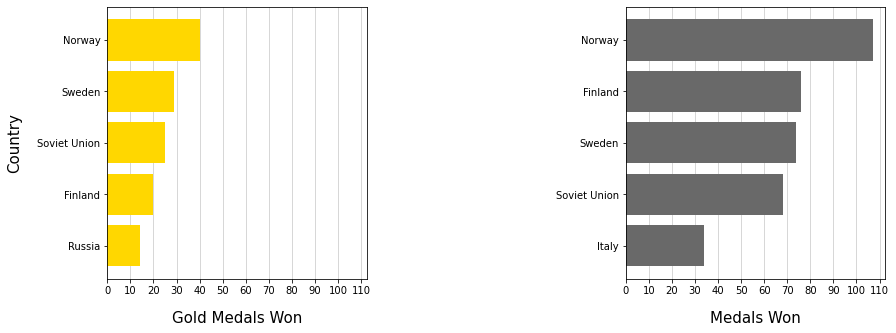

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)
fig.set_figheight(5); fig.set_figwidth(6)
plt.xticks(range(0,120,10))
crosscountry = winter_most_gold.loc[idx[:,'Cross-Country Skiing', 'gold', :]].sort_values(by='Medal Rank', ascending=False).head(5)
crosscountry_tot = winter_most_tot.loc[idx[:,'Cross-Country Skiing', :, :]].sort_values(by='Medal Rank', ascending = False).head(5)

crosscountry = crosscountry.reset_index().drop(['Sport', 'Medal'], axis=1).sort_index(ascending=False)
ax1.barh(crosscountry['Country'], crosscountry['Medal Rank'], color = 'gold')

crosscountry_tot = crosscountry_tot.reset_index().drop(['Sport'], axis=1).sort_index(ascending=False)
ax2.barh(crosscountry_tot['Country'], crosscountry_tot['Medal Rank'], color = 'dimgray')

plt.subplots_adjust(wspace = 1, right=2, left=.2)
ax1.set_xlabel('Gold Medals Won', labelpad=15, size=15)
ax2.set_xlabel('Medals Won', labelpad=15, size=15)
ax1.set_ylabel('Country', labelpad=15, size=15)
ax1.grid(axis = 'x', linewidth = 0.5)
ax1.set_axisbelow(True)
ax2.grid(axis = 'x', linewidth = 0.5)
ax2.set_axisbelow(True)

These results also support part of our next hypothesis. The event that won Norway the most medals, by type, and total medals was Cross-Country Skiing. As it turns out, they are the country that has won the most gold and total medals in this event over the years. Because of the sheer number of medals Norway has won compared to other countries, we do not find these results to be surprising.

### Speedskaing Gold & Total Medals Won by Country:

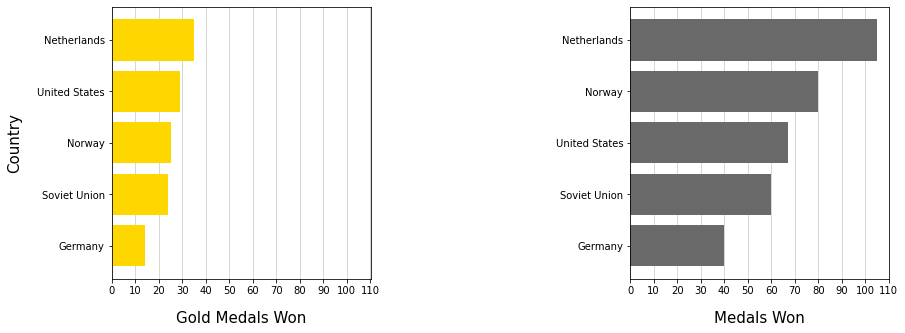

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)
fig.set_figheight(5); fig.set_figwidth(6)
plt.xticks(range(0,120,10))
speedskating = winter_most_gold.loc[idx[:,'Speedskating', 'gold', :]].sort_values(by='Medal Rank', ascending=False).head(5)
speedskating_tot = winter_most_tot.loc[idx[:,'Speedskating', :, :]].sort_values(by='Medal Rank', ascending = False).head(5)

speedskating = speedskating.reset_index().drop(['Sport', 'Medal'], axis=1).sort_index(ascending=False)
ax1.barh(speedskating['Country'], speedskating['Medal Rank'], color = 'gold')

speedskating_tot = speedskating_tot.reset_index().drop(['Sport'], axis=1).sort_index(ascending=False)
ax2.barh(speedskating_tot['Country'], speedskating_tot['Medal Rank'], color = 'dimgray')

plt.subplots_adjust(wspace = 1, right=2, left=.2)
ax1.set_xlabel('Gold Medals Won', labelpad=15, size=15)
ax2.set_xlabel('Medals Won', labelpad=15, size=15)
ax1.set_ylabel('Country', labelpad=15, size=15)
ax1.grid(axis = 'x', linewidth = 0.5)
ax1.set_axisbelow(True)
ax2.grid(axis = 'x', linewidth = 0.5)
ax2.set_axisbelow(True)

These results greatly surprised us. The event that has won the most gold and total medals is Speedskating. Despite this fact, they are not leading in gold and total medals won in this event. This title goes to the Netherlands for both gold and total medals won in this event. The number of gold medals they have won in this event is similar to the number the United States has won, but they have won far more total medals in this event.

In [ ]:
Medal_by_Sport = winter.groupby(['Country', 'Sport', 'Medal']).aggregate('sum').sort_values(by='Medal Count', ascending=False)
Netherlands_Med = Medal_by_Sport.loc[idx['Netherlands', :, :, :]].head(5).style.set_table_attributes("style='display:inline'")

Medal_by_Sport_tot = winter.groupby(['Country', 'Sport']).aggregate('sum').sort_values(by='Medal Count', ascending=False)
Netherlands_Med_tot = Medal_by_Sport_tot.loc[idx['Netherlands', :, :, :]].head(5).style.set_table_attributes("style='display:inline'")

display_html(Netherlands_Med._repr_html_() + Netherlands_Med_tot._repr_html_(), raw=True)

Unsurprisingly, the event that has won the most medals, total and by type, for the Netherlands is Speedskating. What we did find interesting is that the Netherlands has won 110 total medals from 1924 to 2014, and 105 of them are from Speedskating. We were also surprised that they won more silver medals in this category than gold medals, though it's very close.

### Biathlon Gold & Total Medals Won by Country:

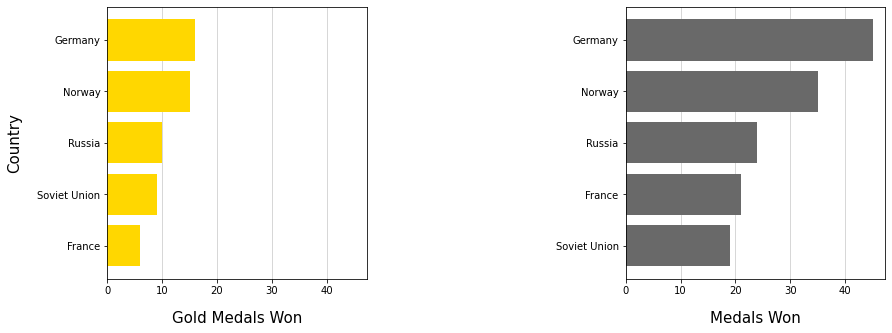

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)
fig.set_figheight(5); fig.set_figwidth(6)
plt.xticks(range(0,120,10))
biathlon = winter_most_gold.loc[idx[:,'Biathlon', 'gold', :]].sort_values(by='Medal Rank', ascending=False).head(5)
biathlon_tot = winter_most_tot.loc[idx[:,'Biathlon', :, :]].sort_values(by='Medal Rank', ascending = False).head(5)

biathlon = biathlon.reset_index().drop(['Sport', 'Medal'], axis=1).sort_index(ascending=False)
ax1.barh(biathlon['Country'], biathlon['Medal Rank'], color = 'gold')

biathlon_tot = biathlon_tot.reset_index().drop(['Sport'], axis=1).sort_index(ascending=False)
ax2.barh(biathlon_tot['Country'], biathlon_tot['Medal Rank'], color = 'dimgray')

plt.subplots_adjust(wspace = 1, right=2, left=.2)
ax1.set_xlabel('Gold Medals Won', labelpad=15, size=15)
ax2.set_xlabel('Medals Won', labelpad=15, size=15)
ax1.set_ylabel('Country', labelpad=15, size=15)
ax1.grid(axis = 'x', linewidth = 0.5)
ax1.set_axisbelow(True)
ax2.grid(axis = 'x', linewidth = 0.5)
ax2.set_axisbelow(True)

Once again, these results are unsurprising. The Biathlon won Germany the most gold and total medals, so we find it unsurprising that they hold the title for most gold and total medals in this category out of all the countries.

# Question Three - Lesser-Known Events and their Top-Placing Countires

### Curling Gold & Total Medals Won by Country:

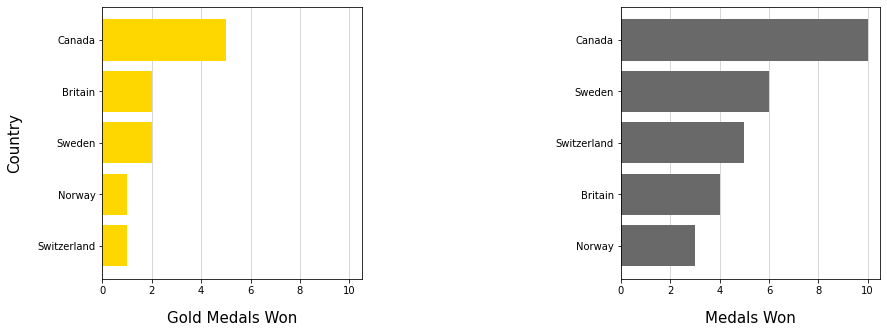

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)
fig.set_figheight(5); fig.set_figwidth(6)
plt.xticks(range(0,11,2))
curling = winter_most_gold.loc[idx[:,'Curling', 'gold', :]].sort_values(by='Medal Rank', ascending=False).head(5)
curling_tot = winter_most_tot.loc[idx[:,'Curling', :, :]].sort_values(by='Medal Rank', ascending = False).head(5)

curling = curling.reset_index().drop(['Sport', 'Medal'], axis=1).sort_index(ascending=False)
ax1.barh(curling['Country'], curling['Medal Rank'], color = 'gold')

curling_tot = curling_tot.reset_index().drop(['Sport'], axis=1).sort_index(ascending=False)
ax2.barh(curling_tot['Country'], curling_tot['Medal Rank'], color = 'dimgray')

plt.subplots_adjust(wspace = 1, right=2, left=.2)
ax1.set_xlabel('Gold Medals Won', labelpad=15, size=15)
ax2.set_xlabel('Medals Won', labelpad=15, size=15)
ax1.set_ylabel('Country', labelpad=15, size=15)
ax1.grid(axis = 'x', linewidth = 0.5)
ax1.set_axisbelow(True)
ax2.grid(axis = 'x', linewidth = 0.5)
ax2.set_axisbelow(True)

This analysis tells us that Canada holds the title for most gold and total medals won for Curling. We were surprised at the small number of total medals that have been won in this category by Canada. Other events have over 100 total medals won for their event in a single country, but this event only has 10 won for the highest medal-winning country.

### Luge Gold & Total Medals Won by Country:

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)
fig.set_figheight(5); fig.set_figwidth(6)
plt.xticks(range(0,37,4))
luge = winter_most_gold.loc[idx[:,'Luge', 'gold', :]].sort_values(by='Medal Rank', ascending=False).head(5)
luge_tot = winter_most_tot.loc[idx[:,'Luge', :, :]].sort_values(by='Medal Rank', ascending = False).head(5)

luge = luge.reset_index().drop(['Sport', 'Medal'], axis=1).sort_index(ascending=False)
ax1.barh(luge['Country'], luge['Medal Rank'], color = 'gold')

luge_tot = luge_tot.reset_index().drop(['Sport'], axis=1).sort_index(ascending=False)
ax2.barh(luge_tot['Country'], luge_tot['Medal Rank'], color = 'dimgray')

plt.subplots_adjust(wspace = 1, right=2, left=.2)
ax1.set_xlabel('Gold Medals Won', labelpad=15, size=15)
ax2.set_xlabel('Medals Won', labelpad=15, size=15)
ax1.set_ylabel('Country', labelpad=15, size=15)
ax1.grid(axis = 'x', linewidth = 0.5)
ax1.set_axisbelow(True)
ax2.grid(axis = 'x', linewidth = 0.5)
ax2.set_axisbelow(True)

This analysis tells us that Germany holds the title for most gold and total medals won for Luge. Something that surprised us about these results is that both East and West Germany showed up in the top total medal winners for this event, East Germany having won almost as many total medals in this event in its short time in the Winter Olympics as Germany.

### Alping Skiing Gold & Total Medals Won by Country:

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)
fig.set_figheight(5); fig.set_figwidth(6)
plt.xticks(range(0,120,10))
alpine_skii = winter_most_gold.loc[idx[:,'Alpine Skiing', 'gold', :]].sort_values(by='Medal Rank', ascending=False).head(5)
alpine_skii_tot = winter_most_tot.loc[idx[:,'Alpine Skiing', :, :]].sort_values(by='Medal Rank', ascending = False).head(5)

alpine_skii = alpine_skii.reset_index().drop(['Sport', 'Medal'], axis=1).sort_index(ascending=False)
ax1.barh(alpine_skii['Country'], alpine_skii['Medal Rank'], color = 'gold')

alpine_skii_tot = alpine_skii_tot.reset_index().drop(['Sport'], axis=1).sort_index(ascending=False)
ax2.barh(alpine_skii_tot['Country'], alpine_skii_tot['Medal Rank'], color = 'dimgray')

plt.subplots_adjust(wspace = 1, right=2, left=.2)
ax1.set_xlabel('Gold Medals Won', labelpad=15, size=15)
ax2.set_xlabel('Medals Won', labelpad=15, size=15)
ax1.set_ylabel('Country', labelpad=15, size=15)
ax1.grid(axis = 'x', linewidth = 0.5)
ax1.set_axisbelow(True)
ax2.grid(axis = 'x', linewidth = 0.5)
ax2.set_axisbelow(True)

This analysis clearly shows that Austria is winning when it comes to gold and total medals won for Alpine Skiing. Something that surprised us from these plots is that Austria has nearly double the number of total medals won as the country that comes in second in this event, Switzerland.

### Snowboarding Gold & Total Medals Won by Country:

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex = True)
fig.set_figheight(5); fig.set_figwidth(6)
plt.xticks(range(0,26,4))
snowboarding = winter_most_gold.loc[idx[:,'Snowboarding', 'gold', :]].sort_values(by='Medal Rank', ascending=False).head(5)
snowboarding_tot = winter_most_tot.loc[idx[:,'Snowboarding', :, :]].sort_values(by='Medal Rank', ascending = False).head(5)

snowboarding = snowboarding.reset_index().drop(['Sport', 'Medal'], axis=1).sort_index(ascending=False)
ax1.barh(snowboarding['Country'], snowboarding['Medal Rank'], color = 'gold')

snowboarding_tot = snowboarding_tot.reset_index().drop(['Sport'], axis=1).sort_index(ascending=False)
ax2.barh(snowboarding_tot['Country'], snowboarding_tot['Medal Rank'], color = 'dimgray')

plt.subplots_adjust(wspace = 1, right=2, left=.2)
ax1.set_xlabel('Gold Medals Won', labelpad=15, size=15)
ax2.set_xlabel('Medals Won', labelpad=15, size=15)
ax1.set_ylabel('Country', labelpad=15, size=15)
ax1.grid(axis = 'x', linewidth = 0.5)
ax1.set_axisbelow(True)
ax2.grid(axis = 'x', linewidth = 0.5)
ax2.set_axisbelow(True)

This analysis shows that the United States is in the lead for both gold and total medals won for Snowboarding. What surprised us about this is that they have won double the number of medals as the country in second place for total number of Snowboarding medals won, Switzerland. We were not surprised to learn that the United States leads in medals won for Snowboarding, but we were surprised to learn that Switzerland was in second place for this event.

### Final Thoughts & Conclusion:

As we wrap up our analysis, we wish to reflect on our hypotheses and examine in a concise manner if our initial thoughts were correct after having the opportunity to explore the data. 

Our first hypothesis was the claim that the top-three medal-winning countries stayed proportional in their medal winning to the number of new events that were added over the years since the Winter Olympics’ induction in 1924. What we found was that Norway has seen a decrease in proportional medals won while the United States has stayed proportional. Germany, considering when it was divided into East and West in the Winter Olympics, has stayed, for the most part, proportional in their medal winning to the total number of medals able to be won.

Our second hypothesis dealt with countries that are known for events. We hypothesized that these countries, namely Russia and Canada, win the most gold and total medals in their respective well-known events. This hypothesis was supported by the data. We found that Russia has won the most gold and total medals for Figure Skating and Canada has won the most gold and total medals for Ice Hockey. 

A second part to this hypothesis was that countries, here the top-three medal-winning countries, win the most medals in the event that wins them the most medals. This hypothesis was only partially supported. The data show that Norway has won the most gold and total medals for Cross-Country Skiing, the event that wins them the most medals, and that Germany has won the most gold and total medals for Biathlon, their top medal-winning sport. In opposition to our hypothesis, we found that the United States is not first in gold or total medals won for Speedskating, the event that wins them the most medals, and that that title belongs to the Netherlands.